In [1]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1000)
I = np.random.rand(3, 3)
print(I)

[[0.65358959 0.11500694 0.95028286]
 [0.4821914  0.87247454 0.21233268]
 [0.04070962 0.39719446 0.2331322 ]]


<ipython-input-3-3f9352fa63e3>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(-0.5, 2.5, 2.5, -0.5)

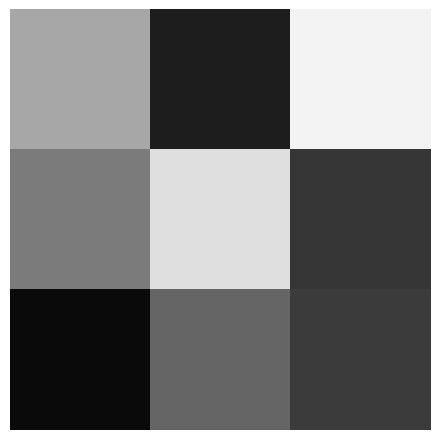

In [3]:
io.imshow(I)
plt.axis("off")

In [4]:
I2 = I + 0.5
print(I2)

[[1.15358959 0.61500694 1.45028286]
 [0.9821914  1.37247454 0.71233268]
 [0.54070962 0.89719446 0.7331322 ]]


In [6]:
# option 1
I2[I2 > 1] = 1
I2[I2 < 0] = 0

# option 2
I2 = np.clip(I+0.5, 0, 1)
print(I2)

[[1.         0.61500694 1.        ]
 [0.9821914  1.         0.71233268]
 [0.54070962 0.89719446 0.7331322 ]]


<ipython-input-7-e778f6f85531>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)
<ipython-input-7-e778f6f85531>:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I2)


(-0.5, 2.5, 2.5, -0.5)

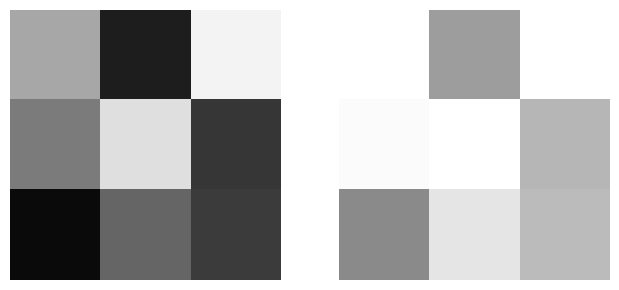

In [7]:
plt.subplot(1, 2, 1)
io.imshow(I)
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(I2)
plt.axis("off")

In [10]:
I3 = I - 0.5
print(I3)

[[ 0.15358959 -0.38499306  0.45028286]
 [-0.0178086   0.37247454 -0.28766732]
 [-0.45929038 -0.10280554 -0.2668678 ]]


In [11]:
I3 = np.clip(I - 0.5, 0, 1)
print(I3)

[[0.15358959 0.         0.45028286]
 [0.         0.37247454 0.        ]
 [0.         0.         0.        ]]


<ipython-input-12-48258a4ba049>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)
<ipython-input-12-48258a4ba049>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I2)
<ipython-input-12-48258a4ba049>:12: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I3)


Text(0.5, 1.0, 'I-0.5')

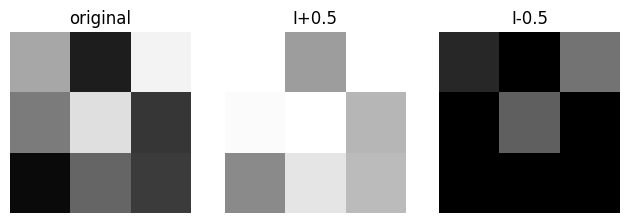

In [12]:
plt.subplot(1, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
io.imshow(I2)
plt.axis("off")
plt.title("I+0.5")

plt.subplot(1, 3, 3)
io.imshow(I3)
plt.axis("off")
plt.title("I-0.5")

<ipython-input-15-0eb0171b1457>:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)
<ipython-input-15-0eb0171b1457>:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I2)
<ipython-input-15-0eb0171b1457>:15: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I3)


Text(0.5, 1.0, 'I/2')

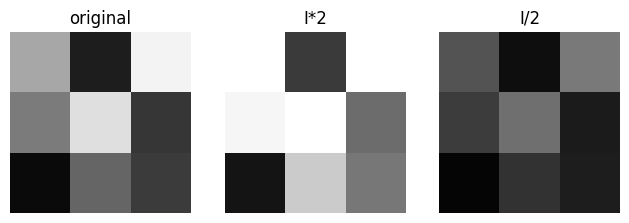

In [15]:
I2 = np.clip(I*2, 0, 1)
I3 = np.clip(I/2, 0, 1)

plt.subplot(1, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
io.imshow(I2)
plt.axis("off")
plt.title("I*2")

plt.subplot(1, 3, 3)
io.imshow(I3)
plt.axis("off")
plt.title("I/2")

In [16]:
I = io.imread("/content/landsat_down.jpeg")
I = I/255.0
I.shape

(1901, 2010)

In [17]:
print(I.min())
print(I.max())

0.0
1.0


<ipython-input-18-a5f674bf7b52>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


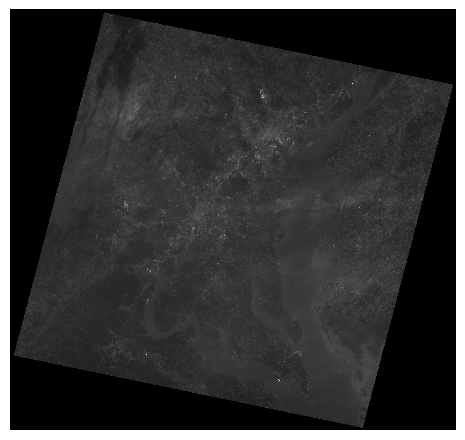

In [18]:
io.imshow(I)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Histogram before')

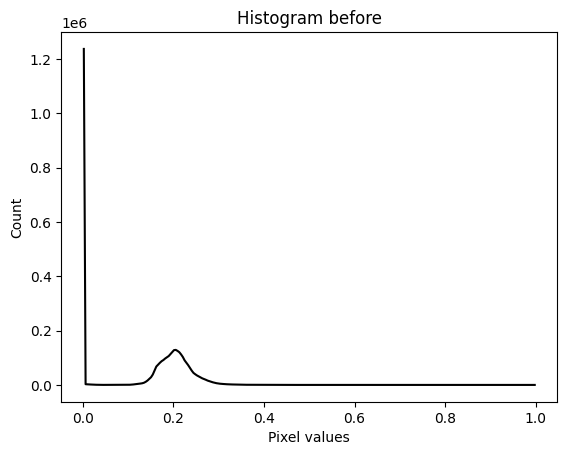

In [19]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=False)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram before")

In [21]:
c1 = 0.1
c2 = 1/(0.3-0.1)

In [22]:
#WRONG
I_stretched = c2*(I-c1)

In [23]:
print(I_stretched.min())
print(I_stretched.max())

-0.5
4.5


In [24]:
#RIGHT
I_stretched = np.clip(c2*(I-c1), 0, 1)

<ipython-input-25-c08c3dd52e56>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_stretched)


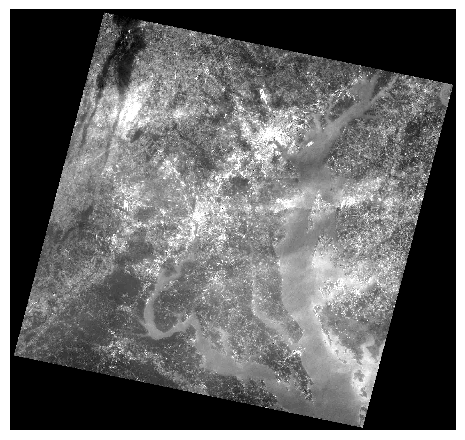

In [25]:
io.imshow(I_stretched)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Histogram after')

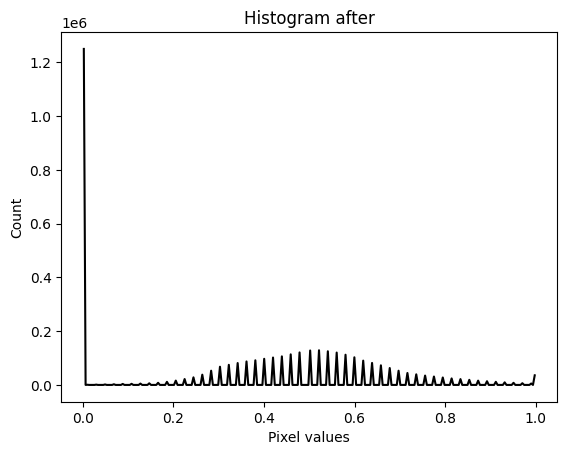

In [26]:
hist, bins_hist = exposure.histogram(I_stretched, nbins=256, normalize=False)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram after")

In [42]:
I = io.imread("xray.jpeg")/255
I = color.rgb2gray(I)

<ipython-input-43-3f9352fa63e3>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(-0.5, 3536.5, 2830.5, -0.5)

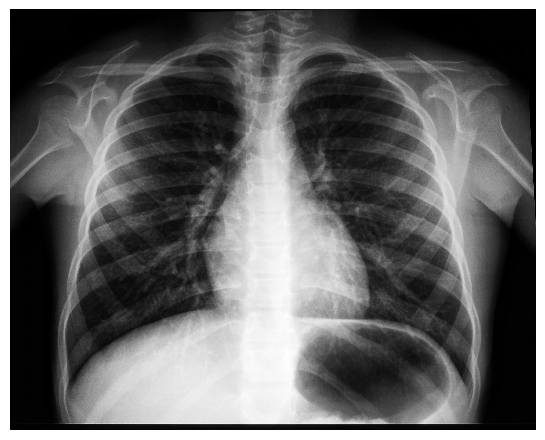

In [43]:
io.imshow(I)
plt.axis("off")

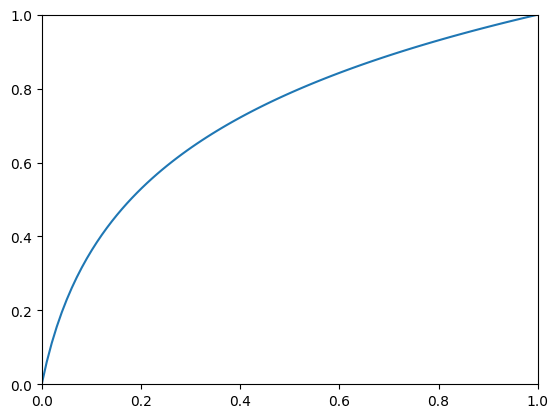

In [44]:
k = 20
x = np.linspace(0, 1, 100)
y = np.log(1 + k * x)
y = y/y.max()

plt.plot(x, y)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

<ipython-input-45-ee9f5a6bde73>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I2)


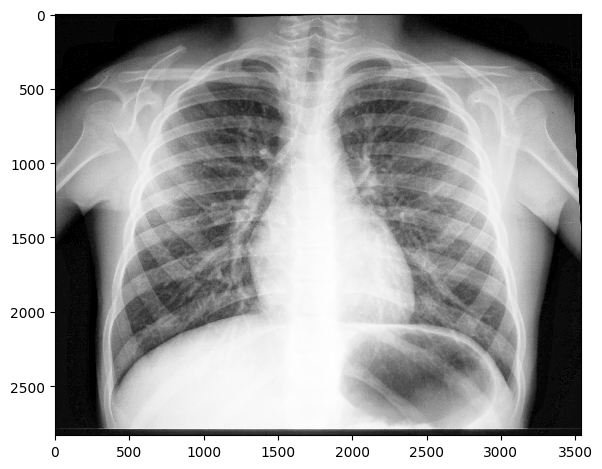

In [45]:
k = 20
I2 = np.log(1 + k*I)
I2 = I2/I2.max()
io.imshow(I2)

In [46]:
I3 = 1 - I

<ipython-input-47-33ea0b42e606>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I3)


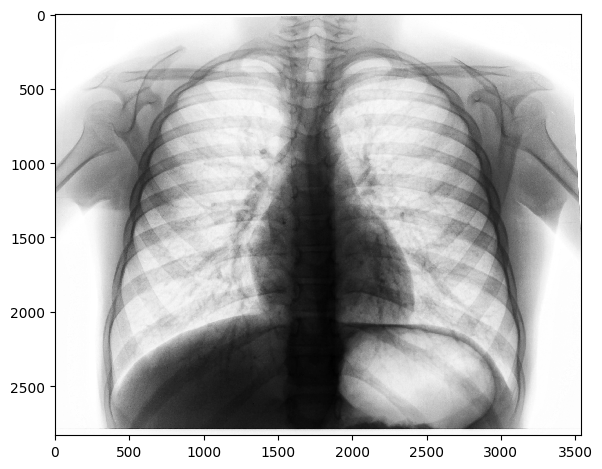

In [47]:
io.imshow(I3)

In [50]:
gamma = 2
c = 1
I4 = c*(I ** gamma)
print(I4.min())
print(I4.max())

0.0
0.9983340277777779


<ipython-input-51-5d3e0d5c5b4a>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I4)


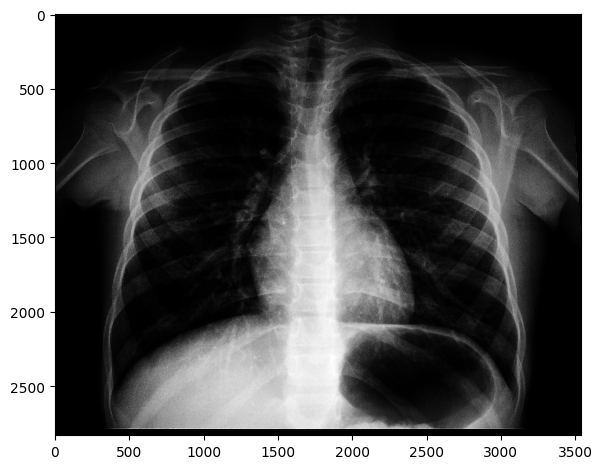

In [51]:
io.imshow(I4)

In [52]:
I = io.imread("/content/angiogram.jpeg")
I = I/255
I.shape

(376, 374)

<ipython-input-53-8e45af2c9820>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


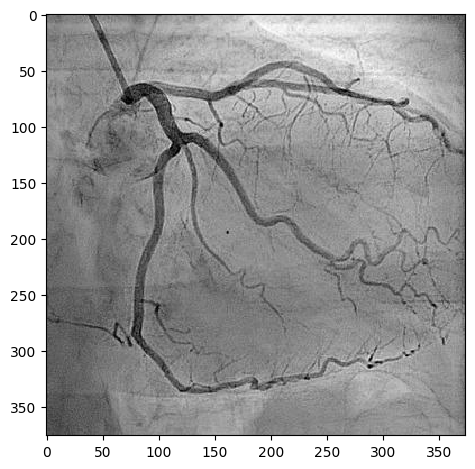

In [53]:
io.imshow(I)
#plt.axis("off")

<ipython-input-55-176f40e3940e>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(negImg)


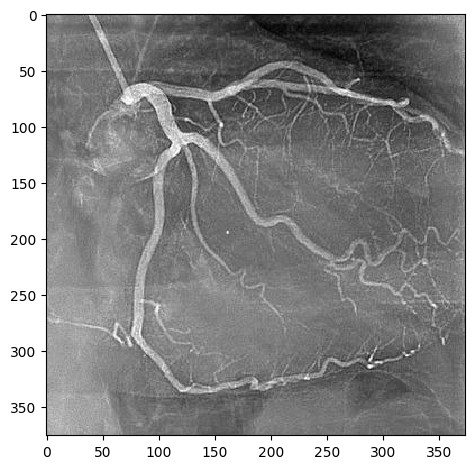

In [55]:
negImg = 1 - I
io.imshow(negImg)

In [56]:
A = 0.6
B = 0.85
negImg[negImg < A] = 0
negImg[negImg > B] = 0

negImg[(negImg >= A) & (negImg <= B)] = 1

<ipython-input-57-10cbeefccaee>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(negImg)


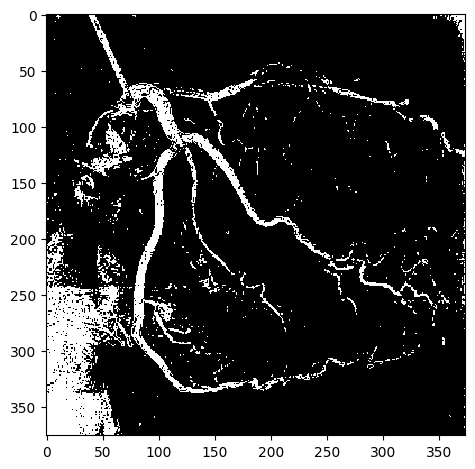

In [57]:
io.imshow(negImg)

In [58]:
negImg2 = 1 - I

In [59]:
A = 0.6
B = 0.85

negImg2[(negImg2 >= A) & (negImg2 <= B)] = 1

<ipython-input-60-bbd1688fe181>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(negImg2)


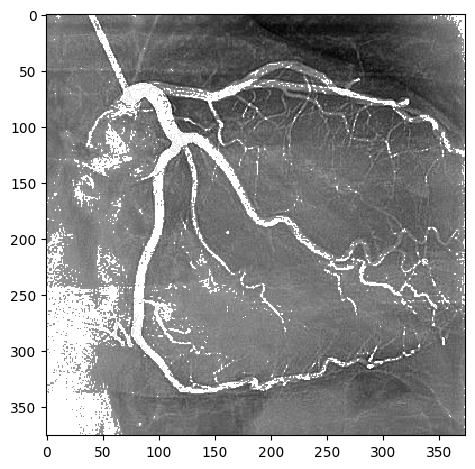

In [60]:
io.imshow(negImg2)